<a href="https://colab.research.google.com/github/aSafarpoor/OSN_FAD/blob/main/CLS/Heeb/AUC_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [39]:
def compute_auc_and_accuracy(y_true, y_scores, verbose = True, do_return = False):
    FPR, TPR, thresholds = metrics.roc_curve(y_true, y_scores)

    AUC = metrics.auc(FPR, TPR)

    optimal_threshold = thresholds[np.argmax(TPR - FPR)]

    y_pred = [1 if score >= optimal_threshold else 0 for score in y_scores]

    accuracy = metrics.accuracy_score(y_true, y_pred)

    # Print details if verbose is True
    if verbose:
        # print(f"False Positive Rate: {FPR}")
        # print(f"True Positive Rate: {TPR}")
        # print(f"Thresholds: {thresholds}")
        print(f"Optimal Threshold: {optimal_threshold}")
        print(f"AUC: {AUC}")
        print(f"Accuracy: {accuracy}")


    if do_return:
        return AUC, optimal_threshold, accuracy

In [40]:
def generate_normal_distribution_list(size, mean, sigma, draw = False):
    numbers = np.random.normal(loc=mean, scale=sigma, size=size)
    numbers = np.clip(numbers, 0, 1) # within [0, 1]

    if draw:
        plt.hist(numbers, bins=30, edgecolor='black', alpha=0.7)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title('Histogram of Generated Numbers')
        plt.show()

    return list(numbers)

In [41]:
def plot_multiple_histograms(data_lists, labels=None, bins=30):
    if labels is None:
        labels = [f"Data {i+1}" for i in range(len(data_lists))]

    # Plot each list with its respective label and color
    for i, data in enumerate(data_lists):
        plt.hist(data, bins=bins, alpha=0.6, label=labels[i], edgecolor='black')

    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Overlayed Histograms')
    plt.legend()
    plt.show()




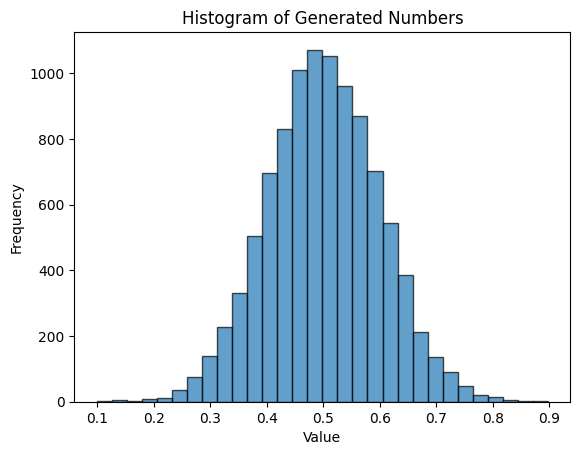

In [42]:
# Example usage
size = 10000  # Size of the list
mean = 0.5  # Desired middle (mean)
sigma = 0.1  # Desired standard deviation

numbers = generate_normal_distribution_list(size, mean, sigma, draw=True)
# print(numbers)

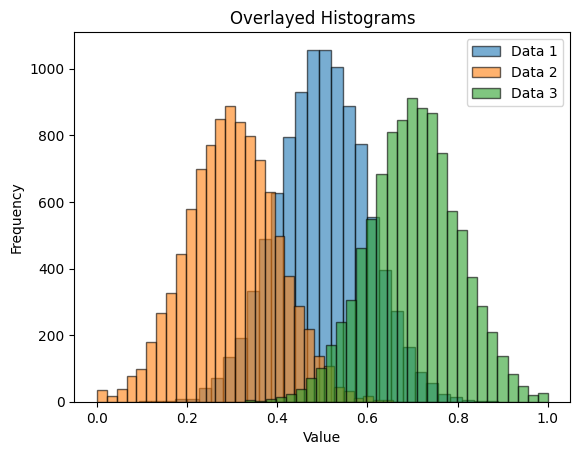

In [43]:
# Example usage
size = 10000
data1 = generate_normal_distribution_list(size, mean=0.5, sigma=0.1)
data2 = generate_normal_distribution_list(size, mean=0.3, sigma=0.1)
data3 = generate_normal_distribution_list(size, mean=0.7, sigma=0.1)

plot_multiple_histograms([data1, data2, data3], labels=['Data 1', 'Data 2', 'Data 3'])

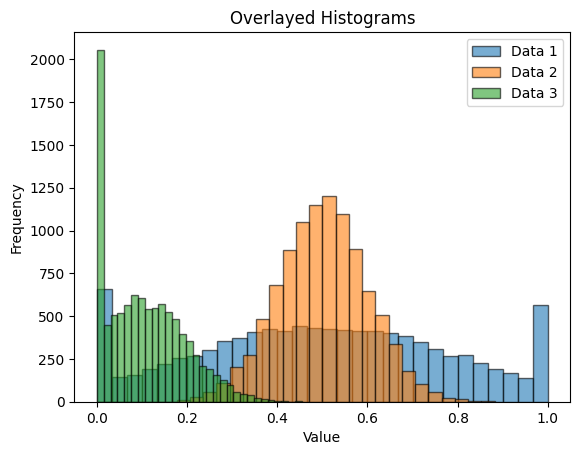

In [44]:
# Example usage
size = 10000
data1 = generate_normal_distribution_list(size, mean=0.5, sigma=0.3)
data2 = generate_normal_distribution_list(size, mean=0.5, sigma=0.1)
data3 = generate_normal_distribution_list(size, mean=0.1, sigma=0.1)

plot_multiple_histograms([data1, data2, data3], labels=['Data 1', 'Data 2', 'Data 3'])

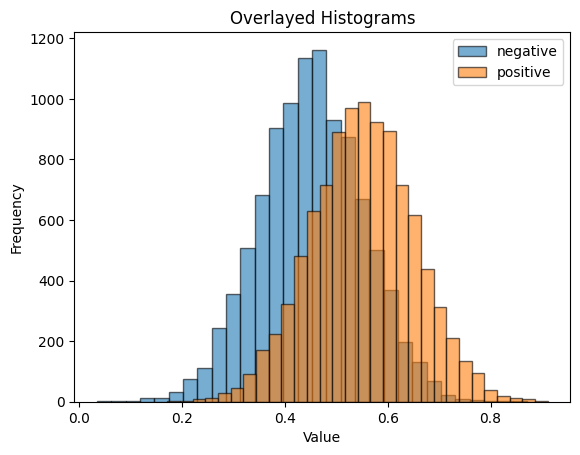

Optimal Threshold: 0.4961501326391681
AUC: 0.76137239
Accuracy: 0.6945


In [48]:
size = 10000
negative = generate_normal_distribution_list(size, mean=0.45, sigma=0.1)
positive = generate_normal_distribution_list(size, mean=0.55, sigma=0.1)

plot_multiple_histograms([negative,positive], labels=["negative","positive"])

x = negative+positive
y = [0 for i in negative]+[1 for i in positive]

compute_auc_and_accuracy(y_true = y, y_scores = x, verbose = True, do_return = False)

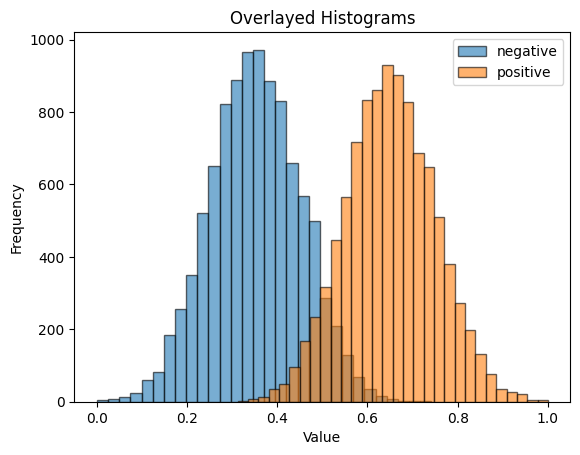

Optimal Threshold: 0.4956125635159993
AUC: 0.98351714
Accuracy: 0.93305


In [49]:
size = 10000
negative = generate_normal_distribution_list(size, mean=0.35, sigma=0.1)
positive = generate_normal_distribution_list(size, mean=0.65, sigma=0.1)

plot_multiple_histograms([negative,positive], labels=["negative","positive"])

x = negative+positive
y = [0 for i in negative]+[1 for i in positive]

compute_auc_and_accuracy(y_true = y, y_scores = x, verbose = True, do_return = False)

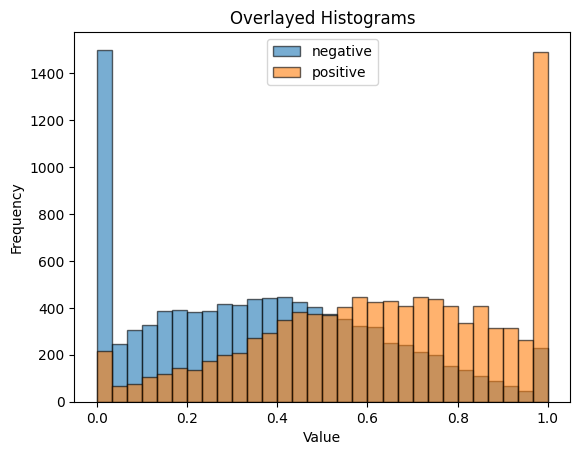

Optimal Threshold: 0.4846420258362157
AUC: 0.758482195
Accuracy: 0.69085


In [58]:
size = 10000
negative = generate_normal_distribution_list(size, mean=0.35, sigma=0.305)
positive = generate_normal_distribution_list(size, mean=0.65, sigma=0.305)

plot_multiple_histograms([negative,positive], labels=["negative","positive"])

x = negative+positive
y = [0 for i in negative]+[1 for i in positive]

compute_auc_and_accuracy(y_true = y, y_scores = x, verbose = True, do_return = False)

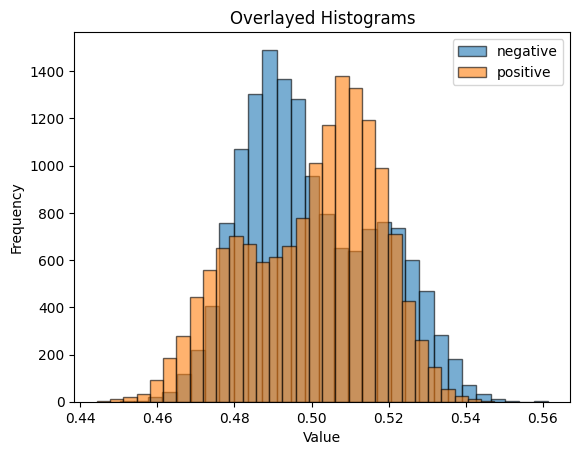

Optimal Threshold: 0.4996354547490372
AUC: 0.5172940755555556
Accuracy: 0.5702666666666667


In [63]:
size = 10000

n1 = generate_normal_distribution_list(size, mean=0.49, sigma=0.01)
n2 = generate_normal_distribution_list(int(size/2), mean=0.52, sigma=0.01)
p1 = generate_normal_distribution_list(size, mean=0.51, sigma=0.01)
p2 = generate_normal_distribution_list(int(size/2), mean=0.48, sigma=0.01)

negative = n1+n2
positive = p1+p2

plot_multiple_histograms([negative,positive], labels=["negative","positive"])

x = negative+positive
y = [0 for i in negative]+[1 for i in positive]

compute_auc_and_accuracy(y_true = y, y_scores = x, verbose = True, do_return = False)

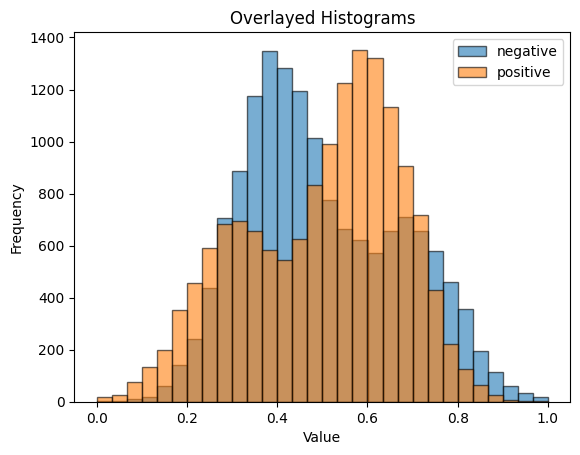

Optimal Threshold: 0.4961344297400853
AUC: 0.51554458
Accuracy: 0.5690333333333333


In [91]:
size = 10000

n1 = generate_normal_distribution_list(size, mean=0.4, sigma=0.1)
n2 = generate_normal_distribution_list(int(size/2), mean=0.7, sigma=0.1)
p1 = generate_normal_distribution_list(size, mean=0.6, sigma=0.1)
p2 = generate_normal_distribution_list(int(size/2), mean=0.3, sigma=0.1)

negative = n1+n2
positive = p1+p2

plot_multiple_histograms([negative,positive], labels=["negative","positive"])

x = negative+positive
y = [0 for i in negative]+[1 for i in positive]

compute_auc_and_accuracy(y_true = y, y_scores = x, verbose = True, do_return = False)

In [86]:
def manual_acc(n1, n2, p1, p2):
    n1 = np.array(n1)
    p1 = np.array(p1)
    n2 = np.array(n2)
    p2 = np.array(p2)

    correct_negatives = sum(n2 < 0.5)+sum(n1 < 0.5)
    correct_positives = sum(p2 > 0.5)+sum(p1 > 0.5)

    correct = correct_negatives + correct_positives

    total = len(n1) + len(n2) + len(p1) + len(p2)

    accuracy = round(correct / total, 4)
    return accuracy

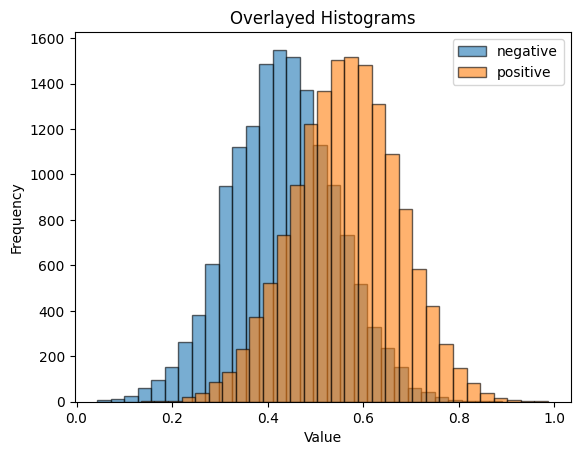

Optimal Threshold: 0.49233942891039584
AUC: 0.8038197688888888
Accuracy: 0.7303666666666667
Manual Acc 0.5:  0.7298


In [90]:
size = 10000

n1 = generate_normal_distribution_list(size, mean=0.4, sigma=0.1)
n2 = generate_normal_distribution_list(int(size/2), mean=0.5, sigma=0.1)
p1 = generate_normal_distribution_list(size, mean=0.6, sigma=0.1)
p2 = generate_normal_distribution_list(int(size/2), mean=0.5, sigma=0.1)

negative = n1+n2
positive = p1+p2

plot_multiple_histograms([negative,positive], labels=["negative","positive"])

x = negative+positive
y = [0 for i in negative]+[1 for i in positive]

compute_auc_and_accuracy(y_true = y, y_scores = x, verbose = True, do_return = False)

print("Manual Acc 0.5: ", manual_acc(n1,n2,p1,p2))

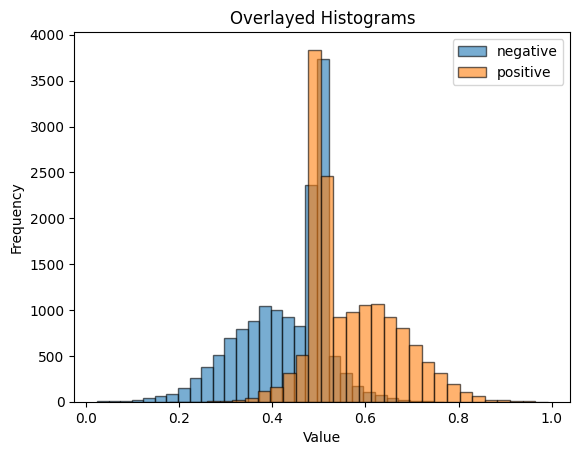

Optimal Threshold: 0.49337456717810446
AUC: 0.8385467155555555
Accuracy: 0.7284333333333334
MAnual Acc 0.5:  0.7263


In [88]:
size = 10000

n1 = generate_normal_distribution_list(size, mean=0.4, sigma=0.1)
n2 = generate_normal_distribution_list(int(size/2), mean=0.5, sigma=0.01)
p1 = generate_normal_distribution_list(size, mean=0.6, sigma=0.1)
p2 = generate_normal_distribution_list(int(size/2), mean=0.5, sigma=0.01)

negative = n1+n2
positive = p1+p2

plot_multiple_histograms([negative,positive], labels=["negative","positive"])

x = negative+positive
y = [0 for i in negative]+[1 for i in positive]

compute_auc_and_accuracy(y_true = y, y_scores = x, verbose = True, do_return = False)

print("MAnual Acc 0.5: ", manual_acc(n1,n2,p1,p2))

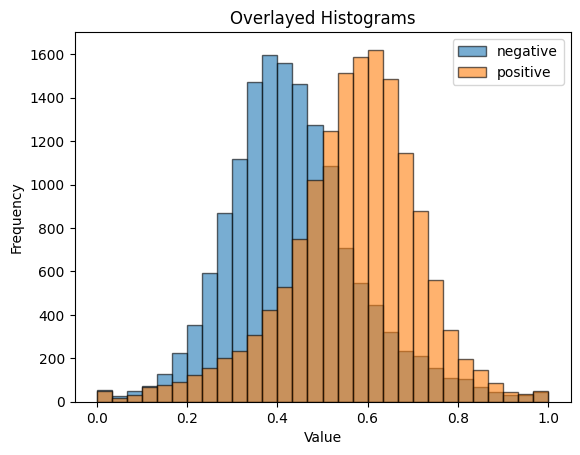

Optimal Threshold: 0.5122749686151882
AUC: 0.7640066822222222
Accuracy: 0.7272
MAnual Acc 0.5:  0.7262


In [89]:
size = 10000

n1 = generate_normal_distribution_list(size, mean=0.4, sigma=0.1)
n2 = generate_normal_distribution_list(int(size/2), mean=0.5, sigma=0.2)
p1 = generate_normal_distribution_list(size, mean=0.6, sigma=0.1)
p2 = generate_normal_distribution_list(int(size/2), mean=0.5, sigma=0.2)

negative = n1+n2
positive = p1+p2

plot_multiple_histograms([negative,positive], labels=["negative","positive"])

x = negative+positive
y = [0 for i in negative]+[1 for i in positive]

compute_auc_and_accuracy(y_true = y, y_scores = x, verbose = True, do_return = False)

print("MAnual Acc 0.5: ", manual_acc(n1,n2,p1,p2))

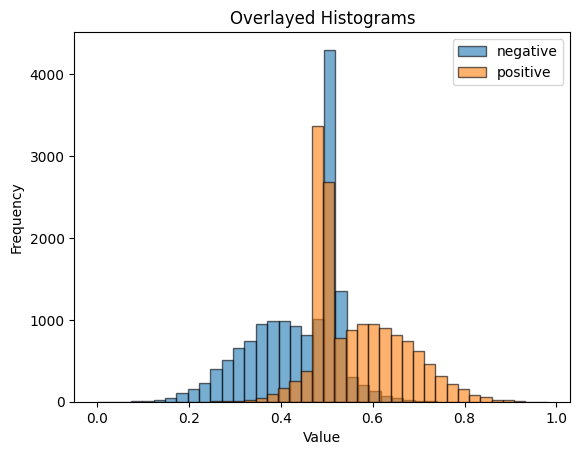

Optimal Threshold: 0.46746234038595325
AUC: 0.7801934888888888
Accuracy: 0.7176666666666667
MAnual Acc 0.5:  0.6136


In [92]:
size = 10000

n1 = generate_normal_distribution_list(size, mean=0.4, sigma=0.1)
n2 = generate_normal_distribution_list(int(size/2), mean=0.51, sigma=0.01)
p1 = generate_normal_distribution_list(size, mean=0.6, sigma=0.1)
p2 = generate_normal_distribution_list(int(size/2), mean=0.49, sigma=0.01)

negative = n1+n2
positive = p1+p2

plot_multiple_histograms([negative,positive], labels=["negative","positive"])

x = negative+positive
y = [0 for i in negative]+[1 for i in positive]

compute_auc_and_accuracy(y_true = y, y_scores = x, verbose = True, do_return = False)

print("MAnual Acc 0.5: ", manual_acc(n1,n2,p1,p2))